## unit 2 -פונקציות בסיסיות +מציאת עמודות/ערכים
## unit 3 - ערכים חסרים ומילוי ערכים חסרים 
## unit 4 - היסטוגרמות + גרופבי + בוקס פלוט
## unit 5 - קורולציות וסוגי קורלציות 
## unit 6 - בוקס פלוט והמשך קורולציות 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib as mpl

# Unit 2


In [2]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url)

In [3]:
type(vacc_df)

pandas.core.frame.DataFrame

view the shape of the dataframe:

In [4]:
vacc_df.shape

(26370, 12)

view basic information:

In [5]:
vacc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26370 entries, 0 to 26369
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   location                             26370 non-null  object 
 1   iso_code                             26370 non-null  object 
 2   date                                 26370 non-null  object 
 3   total_vaccinations                   15712 non-null  float64
 4   people_vaccinated                    14920 non-null  float64
 5   people_fully_vaccinated              12016 non-null  float64
 6   daily_vaccinations_raw               13331 non-null  float64
 7   daily_vaccinations                   26127 non-null  float64
 8   total_vaccinations_per_hundred       15712 non-null  float64
 9   people_vaccinated_per_hundred        14920 non-null  float64
 10  people_fully_vaccinated_per_hundred  12016 non-null  float64
 11  daily_vaccinations_per_milli

In [6]:
vacc_df.columns

Index(['location', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred',
       'daily_vaccinations_per_million'],
      dtype='object')

View the first few rows:

In [7]:
vacc_df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


In [8]:
vacc_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.571200e+04,1.492000e+04,1.201600e+04,1.333100e+04,2.612700e+04,15712.000000,14920.000000,12016.000000,26127.000000
mean,3.127350e+07,1.716079e+07,9.449848e+06,7.215781e+05,3.643458e+05,21.362422,14.377736,8.242909,3162.813909
std,1.377210e+08,7.064747e+07,3.782334e+07,2.874687e+06,1.978697e+06,28.386216,17.649324,12.245640,4410.094903
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.182440e+05,9.095950e+04,4.375050e+04,5.029500e+03,9.550000e+02,1.880000,1.580000,0.720000,358.000000
50%,9.303075e+05,6.616765e+05,3.605960e+05,2.706400e+04,7.984000e+03,9.420000,6.775000,3.220000,1649.000000
75%,5.589518e+06,3.897239e+06,2.172044e+06,1.589245e+05,4.712600e+04,29.722500,21.080000,10.450000,4557.500000
max,2.388365e+09,1.609983e+09,7.267168e+08,3.972790e+07,3.581781e+07,230.780000,116.110000,114.670000,118759.000000


A summary of the functions so far:

* `pd.read_csv` - Read data from a CSV file into a Pandas `DataFrame` object
* `.info()` - View basic infomation about rows, columns & data types
* `.describe()` - View statistical information about numeric columns
* `.columns` - Get the list of column names
* `.shape` - Get the number of rows & columns as a tuple
* `.head`, `.tail`


<a id='section3'></a>

---
## 3. Selecting data



#### The index of a dataframe doesn't have to be numeric
### יצירת דאטה 

In [9]:
df = pd.DataFrame({'age':[30, 2, 12, 4, 32, 33, 69],
                   'color':['blue', 'green', 'red', 'white', 'gray', 'black', 'red'],
                   'food':['Steak', 'Lamb', 'Mango', 'Apple', 'Cheese', 'Melon', 'Beans'],
                   'height':[165, 70, 120, 80, 180, 172, 150],
                   'score':[4.6, 8.3, 9.0, 3.3, 1.8, 9.5, 2.2],
                   'state':['NY', 'TX', 'FL', 'AL', 'AK', 'TX', 'TX']
                   },
                  index=['Jane', 'Nick', 'Aaron', 'Penelope', 'Dean', 'Christina', 'Cornelia'])
df

,age,color,food,height,score,state
Jane,30,blue,Steak,165,4.6,NY
Nick,2,green,Lamb,70,8.3,TX
Aaron,12,red,Mango,120,9.0,FL
Penelope,4,white,Apple,80,3.3,AL
Dean,32,gray,Cheese,180,1.8,AK
Christina,33,black,Melon,172,9.5,TX
Cornelia,69,red,Beans,150,2.2,TX


In our case it just happens to be numeric:

In [10]:
vacc_df.location
#is the same as this:
vacc_df['location']

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
26365       Zimbabwe
26366       Zimbabwe
26367       Zimbabwe
26368       Zimbabwe
26369       Zimbabwe
Name: location, Length: 26370, dtype: object

note: using the `.` notation is possible only for columns whose names do not contain spaces or special characters

what data type is vacc_df.location? (list? series? dataframe?)

In [11]:
type(vacc_df.location)

pandas.core.series.Series

In [12]:
#retrieve a specific cell
vacc_df.location[333]

'Albania'

In [13]:
#retrieve two columns
vacc_df[['location','date']]

,location,date
0,Afghanistan,2021-02-22
1,Afghanistan,2021-02-23
2,Afghanistan,2021-02-24
3,Afghanistan,2021-02-25
4,Afghanistan,2021-02-26
...,...,...
26365,Zimbabwe,2021-06-09
26366,Zimbabwe,2021-06-10
26367,Zimbabwe,2021-06-11
26368,Zimbabwe,2021-06-12


#### Seletcting subsets of rows and columns

One way to do that is iloc. 

`.iloc` - selects subsets of rows and columns by integer location only

In [14]:
#Rows:
vacc_df.iloc[0]  #first row
vacc_df.iloc[-1] #last row


location                                  Zimbabwe
iso_code                                       ZWE
date                                    2021-06-13
total_vaccinations                     1.10706e+06
people_vaccinated                           693147
people_fully_vaccinated                     413911
daily_vaccinations_raw                        3660
daily_vaccinations                            5564
total_vaccinations_per_hundred                7.45
people_vaccinated_per_hundred                 4.66
people_fully_vaccinated_per_hundred           2.78
daily_vaccinations_per_million                 374
Name: 26369, dtype: object

The : operator 

 - when used alone it means "everything"

- also used to indicate a ***slice*** of values


In [15]:
vacc_df.iloc[1:2] # second and third row
vacc_df.iloc[[-1,2,22]] #a few specific rows

# Columns:
vacc_df.iloc[:,0] # first column of data frame  
vacc_df.iloc[:,1] # second column of data frame  
vacc_df.iloc[:,-1] # last column of data frame

#Rows and columns
vacc_df.iloc[0:5] # first five rows of dataframe
vacc_df.iloc[:, 0:2] # first two columns of data frame with all rows
vacc_df.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.

,location,people_fully_vaccinated,daily_vaccinations_raw
0,Afghanistan,NaN,NaN
3,Afghanistan,NaN,NaN
6,Afghanistan,NaN,NaN
24,Afghanistan,NaN,NaN


What if I want to select the 'daily_vaccinations' column, but I don't remember which column it is?

Use `.loc`

`.loc` - selects subsets of rows and columns by label only. Allowed inputs are:

- A single label, e.g. 5 or 'a', (note that 5 is interpreted as a label of the index, and never as an integer position along the index).

- A list or array of labels, e.g. ['a', 'b', 'c'].

- A slice object with labels, e.g. 'a':'f'.

In [16]:
vacc_df.loc[:,'daily_vaccinations']

0           NaN
1        1367.0
2        1367.0
3        1367.0
4        1367.0
          ...  
26365    6253.0
26366    5857.0
26367    5802.0
26368    5921.0
26369    5564.0
Name: daily_vaccinations, Length: 26370, dtype: float64

I'm missing the location. Let's add it. 

In [17]:
vacc_df.loc[:,['location','daily_vaccinations']]

#vacc_df.loc[0:4:,['location', 'total_vaccinations']]  this is to select specific rows

,location,daily_vaccinations
0,Afghanistan,NaN
1,Afghanistan,1367.0
2,Afghanistan,1367.0
3,Afghanistan,1367.0
4,Afghanistan,1367.0
...,...,...
26365,Zimbabwe,6253.0
26366,Zimbabwe,5857.0
26367,Zimbabwe,5802.0
26368,Zimbabwe,5921.0


Semantics are similar to iloc. But note:

- `iloc` excludes the last element.  `df.iloc[0:1000]` will return entries 0...999
- `loc`, includes the last element.  `df.loc[0:1000]` will return entries 0...1000

you try it! What is the difference between:

> vacc_df.iloc[0:5]

> vacc_df.loc[0:5]

---
A summary of the functions in this unit:

* `.iloc` - selects rows and columns by integer location
* `.loc` - selects rows and columns by label location



Note: indexing operators as the ones working on dictionaries, will also work in pandas. But for more advanced operations, better get used to loc and iloc.

---

<a id='section4'></a>

## 4. Conditional selection




In [18]:
vacc_df.loc[:,'location'] 

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
26365       Zimbabwe
26366       Zimbabwe
26367       Zimbabwe
26368       Zimbabwe
26369       Zimbabwe
Name: location, Length: 26370, dtype: object

This creates a series of true/false 

We can insert this into data to select only that task:

Another way:

In [19]:
vacc_df.loc[vacc_df.location == 'Israel']

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
11663,Israel,ISR,2020-12-19,60.0,60.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
11664,Israel,ISR,2020-12-20,7419.0,7419.0,NaN,7359.0,7359.0,0.09,0.09,NaN,850.0
11665,Israel,ISR,2020-12-21,32303.0,32303.0,NaN,24884.0,16122.0,0.37,0.37,NaN,1863.0
11666,Israel,ISR,2020-12-22,76915.0,76915.0,NaN,44612.0,25618.0,0.89,0.89,NaN,2960.0
11667,Israel,ISR,2020-12-23,139748.0,139748.0,NaN,62833.0,34922.0,1.61,1.61,NaN,4035.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11835,Israel,ISR,2021-06-09,10613376.0,5471766.0,5141610.0,4568.0,3349.0,122.62,63.22,59.40,387.0
11836,Israel,ISR,2021-06-10,10617667.0,5474941.0,5142726.0,4291.0,3565.0,122.67,63.25,59.42,412.0
11837,Israel,ISR,2021-06-11,10619306.0,5476180.0,5143126.0,1639.0,3590.0,122.69,63.27,59.42,415.0
11838,Israel,ISR,2021-06-12,10619532.0,5476317.0,5143215.0,226.0,3598.0,122.69,63.27,59.42,416.0


Select two countries:

In [20]:
two_countries = vacc_df.loc[(vacc_df.location == 'Israel') | (vacc_df.location == 'Denmark')]
two_countries

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
6032,Denmark,DNK,2020-12-17,1.0,1.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
6033,Denmark,DNK,2020-12-18,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
6034,Denmark,DNK,2020-12-19,2.0,2.0,NaN,NaN,0.0,0.00,0.00,NaN,0.0
6035,Denmark,DNK,2020-12-20,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
6036,Denmark,DNK,2020-12-21,3.0,3.0,NaN,NaN,0.0,0.00,0.00,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11835,Israel,ISR,2021-06-09,10613376.0,5471766.0,5141610.0,4568.0,3349.0,122.62,63.22,59.40,387.0
11836,Israel,ISR,2021-06-10,10617667.0,5474941.0,5142726.0,4291.0,3565.0,122.67,63.25,59.42,412.0
11837,Israel,ISR,2021-06-11,10619306.0,5476180.0,5143126.0,1639.0,3590.0,122.69,63.27,59.42,415.0
11838,Israel,ISR,2021-06-12,10619532.0,5476317.0,5143215.0,226.0,3598.0,122.69,63.27,59.42,416.0


only the indexs of the tasks:

In [21]:
two_countries.index.values

array([ 6032,  6033,  6034,  6035,  6036,  6037,  6038,  6039,  6040,
        6041,  6042,  6043,  6044,  6045,  6046,  6047,  6048,  6049,
        6050,  6051,  6052,  6053,  6054,  6055,  6056,  6057,  6058,
        6059,  6060,  6061,  6062,  6063,  6064,  6065,  6066,  6067,
        6068,  6069,  6070,  6071,  6072,  6073,  6074,  6075,  6076,
        6077,  6078,  6079,  6080,  6081,  6082,  6083,  6084,  6085,
        6086,  6087,  6088,  6089,  6090,  6091,  6092,  6093,  6094,
        6095,  6096,  6097,  6098,  6099,  6100,  6101,  6102,  6103,
        6104,  6105,  6106,  6107,  6108,  6109,  6110,  6111,  6112,
        6113,  6114,  6115,  6116,  6117,  6118,  6119,  6120,  6121,
        6122,  6123,  6124,  6125,  6126,  6127,  6128,  6129,  6130,
        6131,  6132,  6133,  6134,  6135,  6136,  6137,  6138,  6139,
        6140,  6141,  6142,  6143,  6144,  6145,  6146,  6147,  6148,
        6149,  6150,  6151,  6152,  6153,  6154,  6155,  6156,  6157,
        6158,  6159,

the index in the first place:

In [22]:
two_countries.index.values[0]

6032

how many rows for the two countries?

In [23]:
two_countries.count()

location                               356
iso_code                               356
date                                   356
total_vaccinations                     353
people_vaccinated                      353
people_fully_vaccinated                322
daily_vaccinations_raw                 348
daily_vaccinations                     354
total_vaccinations_per_hundred         353
people_vaccinated_per_hundred          353
people_fully_vaccinated_per_hundred    322
daily_vaccinations_per_million         354
dtype: int64

At the end of the file we have some world data.

Use str.contains if you're not sure how this location is called

In [24]:
            
vacc_df[vacc_df['location'].str.contains('World')]             
             

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
25977,World,OWID_WRL,2020-12-02,0.000000e+00,0.000000e+00,NaN,NaN,NaN,0.00,0.00,NaN,NaN
25978,World,OWID_WRL,2020-12-03,0.000000e+00,0.000000e+00,NaN,0.0,0.0,0.00,0.00,NaN,0.0
25979,World,OWID_WRL,2020-12-04,0.000000e+00,0.000000e+00,NaN,0.0,0.0,0.00,0.00,NaN,0.0
25980,World,OWID_WRL,2020-12-05,0.000000e+00,0.000000e+00,NaN,0.0,0.0,0.00,0.00,NaN,0.0
25981,World,OWID_WRL,2020-12-06,0.000000e+00,0.000000e+00,NaN,0.0,0.0,0.00,0.00,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26166,World,OWID_WRL,2021-06-09,2.260607e+09,9.462253e+08,483695316.0,39097638.0,34101188.0,29.00,12.14,6.21,4375.0
26167,World,OWID_WRL,2021-06-10,2.299138e+09,1.579802e+09,713425895.0,38531121.0,34568947.0,29.50,20.27,9.15,4435.0
26168,World,OWID_WRL,2021-06-11,2.334008e+09,1.590697e+09,719105439.0,34869618.0,34053390.0,29.94,20.41,9.23,4369.0
26169,World,OWID_WRL,2021-06-12,2.361009e+09,1.600531e+09,723239346.0,27001307.0,33596120.0,30.29,20.53,9.28,4310.0


Remove the world data:

In [25]:
vacc_df_noWorld = vacc_df.loc[vacc_df.location != 'World']
vacc_df_noWorld.tail()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
26365,Zimbabwe,ZWE,2021-06-09,1083983.0,689920.0,394063.0,5174.0,6253.0,7.29,4.64,2.65,421.0
26366,Zimbabwe,ZWE,2021-06-10,1089506.0,690452.0,399054.0,5523.0,5857.0,7.33,4.65,2.68,394.0
26367,Zimbabwe,ZWE,2021-06-11,1096854.0,691251.0,405603.0,7348.0,5802.0,7.38,4.65,2.73,390.0
26368,Zimbabwe,ZWE,2021-06-12,1103398.0,692180.0,411218.0,6544.0,5921.0,7.42,4.66,2.77,398.0
26369,Zimbabwe,ZWE,2021-06-13,1107058.0,693147.0,413911.0,3660.0,5564.0,7.45,4.66,2.78,374.0


Find the country with the maximum vaccinations:

In [26]:
max_vacc = vacc_df_noWorld.total_vaccinations.max()
max_vacc

1381415586.0

In [27]:
vacc_df_noWorld.loc[vacc_df_noWorld.total_vaccinations == max_vacc]

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
1508,Asia,OWID_ASI,2021-06-13,1.381416e+09,971013031.0,343191219.0,22228175.0,23830807.0,29.77,20.93,7.4,5136.0


What do you think this function does?

In [28]:
vacc_df_noWorld.total_vaccinations.mean()

23916679.769171286

---
Summary of the functions in this unit:

* `.index.values` - the row indexes of this part of the dataframes
* `.str.contains` - selects rows and columns that contain a string
* `.max` - maximum value
* `.mean` - average value
* `.count` - the number of rows that contain a value

# Unit 3 - missing values
---

1. Find rows with missing values
2. Remove missing values using dropna()  
3. Fill missing values using fillna()
4. Fill missing values using interpolate()





In [29]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url)

<a id='section1'></a>

`null` / `na` - no value

`NaN` - **N**ot **a** **N**umber - the value is missing. This value will be ignored in calculations such as `.mean()`


### 1. Find rows with missing values

In [30]:
vacc_df.isnull().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     10658
people_vaccinated                      11450
people_fully_vaccinated                14354
daily_vaccinations_raw                 13039
daily_vaccinations                       243
total_vaccinations_per_hundred         10658
people_vaccinated_per_hundred          11450
people_fully_vaccinated_per_hundred    14354
daily_vaccinations_per_million           243
dtype: int64

`isnull()` is a pandas function, so either use it on a dataframe or call it through pd

In [31]:
pd.isnull(vacc_df).sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     10658
people_vaccinated                      11450
people_fully_vaccinated                14354
daily_vaccinations_raw                 13039
daily_vaccinations                       243
total_vaccinations_per_hundred         10658
people_vaccinated_per_hundred          11450
people_fully_vaccinated_per_hundred    14354
daily_vaccinations_per_million           243
dtype: int64

In [32]:
vacc_df['daily_vaccinations'].notnull().sum()

26127

In [33]:
vacc_df['daily_vaccinations'].isnull().sum()

243

`isnan` is a numpy function

In [34]:
np.isnan(vacc_df['daily_vaccinations']).sum()

243

### 2. Remove missing values using dropna() 

Zimbabwe contains missing values

In [35]:
zimbabwe = vacc_df.loc[vacc_df.location == 'Zimbabwe']
zimbabwe.head(10)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
26254,Zimbabwe,ZWE,2021-02-18,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
26255,Zimbabwe,ZWE,2021-02-19,NaN,NaN,NaN,NaN,328.0,NaN,NaN,NaN,22.0
26256,Zimbabwe,ZWE,2021-02-20,NaN,NaN,NaN,NaN,328.0,NaN,NaN,NaN,22.0
26257,Zimbabwe,ZWE,2021-02-21,NaN,NaN,NaN,NaN,328.0,NaN,NaN,NaN,22.0
26258,Zimbabwe,ZWE,2021-02-22,1314.0,1314.0,NaN,NaN,328.0,0.01,0.01,NaN,22.0
26259,Zimbabwe,ZWE,2021-02-23,4041.0,4041.0,NaN,2727.0,808.0,0.03,0.03,NaN,54.0
26260,Zimbabwe,ZWE,2021-02-24,7872.0,7872.0,NaN,3831.0,1312.0,0.05,0.05,NaN,88.0
26261,Zimbabwe,ZWE,2021-02-25,11007.0,11007.0,NaN,3135.0,1572.0,0.07,0.07,NaN,106.0
26262,Zimbabwe,ZWE,2021-02-26,12579.0,12579.0,NaN,1572.0,1750.0,0.08,0.08,NaN,118.0
26263,Zimbabwe,ZWE,2021-02-27,15705.0,15705.0,NaN,3126.0,2150.0,0.11,0.11,NaN,145.0


In [36]:
zimbabwe['total_vaccinations'].isnull().sum()

3

In [37]:
zimbabwe[zimbabwe['total_vaccinations'].notnull()]

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
26254,Zimbabwe,ZWE,2021-02-18,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
26258,Zimbabwe,ZWE,2021-02-22,1314.0,1314.0,NaN,NaN,328.0,0.01,0.01,NaN,22.0
26259,Zimbabwe,ZWE,2021-02-23,4041.0,4041.0,NaN,2727.0,808.0,0.03,0.03,NaN,54.0
26260,Zimbabwe,ZWE,2021-02-24,7872.0,7872.0,NaN,3831.0,1312.0,0.05,0.05,NaN,88.0
26261,Zimbabwe,ZWE,2021-02-25,11007.0,11007.0,NaN,3135.0,1572.0,0.07,0.07,NaN,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26365,Zimbabwe,ZWE,2021-06-09,1083983.0,689920.0,394063.0,5174.0,6253.0,7.29,4.64,2.65,421.0
26366,Zimbabwe,ZWE,2021-06-10,1089506.0,690452.0,399054.0,5523.0,5857.0,7.33,4.65,2.68,394.0
26367,Zimbabwe,ZWE,2021-06-11,1096854.0,691251.0,405603.0,7348.0,5802.0,7.38,4.65,2.73,390.0
26368,Zimbabwe,ZWE,2021-06-12,1103398.0,692180.0,411218.0,6544.0,5921.0,7.42,4.66,2.77,398.0


We can see the difference between the number of values per row

In [38]:
zimbabwe.count()

location                               116
iso_code                               116
date                                   116
total_vaccinations                     113
people_vaccinated                      113
people_fully_vaccinated                 84
daily_vaccinations_raw                 111
daily_vaccinations                     115
total_vaccinations_per_hundred         113
people_vaccinated_per_hundred          113
people_fully_vaccinated_per_hundred     84
daily_vaccinations_per_million         115
dtype: int64

Remove all values for a specific column

In [39]:
zimbabwe.dropna(subset = ['total_vaccinations']).count()

location                               113
iso_code                               113
date                                   113
total_vaccinations                     113
people_vaccinated                      113
people_fully_vaccinated                 84
daily_vaccinations_raw                 111
daily_vaccinations                     112
total_vaccinations_per_hundred         113
people_vaccinated_per_hundred          113
people_fully_vaccinated_per_hundred     84
daily_vaccinations_per_million         112
dtype: int64

In [40]:
zimbabwe.dropna(subset = ['total_vaccinations', 'daily_vaccinations_per_million']).head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
26258,Zimbabwe,ZWE,2021-02-22,1314.0,1314.0,NaN,NaN,328.0,0.01,0.01,NaN,22.0
26259,Zimbabwe,ZWE,2021-02-23,4041.0,4041.0,NaN,2727.0,808.0,0.03,0.03,NaN,54.0
26260,Zimbabwe,ZWE,2021-02-24,7872.0,7872.0,NaN,3831.0,1312.0,0.05,0.05,NaN,88.0
26261,Zimbabwe,ZWE,2021-02-25,11007.0,11007.0,NaN,3135.0,1572.0,0.07,0.07,NaN,106.0
26262,Zimbabwe,ZWE,2021-02-26,12579.0,12579.0,NaN,1572.0,1750.0,0.08,0.08,NaN,118.0


For all columns

In [41]:
zimbabwe.dropna()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
26286,Zimbabwe,ZWE,2021-03-22,43574.0,43294.0,280.0,845.0,845.0,0.29,0.29,0.00,57.0
26287,Zimbabwe,ZWE,2021-03-23,45197.0,44135.0,1062.0,1623.0,807.0,0.30,0.30,0.01,54.0
26288,Zimbabwe,ZWE,2021-03-24,51893.0,49404.0,2489.0,6696.0,1755.0,0.35,0.33,0.02,118.0
26289,Zimbabwe,ZWE,2021-03-25,58987.0,54892.0,4095.0,7094.0,2712.0,0.40,0.37,0.03,182.0
26290,Zimbabwe,ZWE,2021-03-26,67662.0,61093.0,6569.0,8675.0,3711.0,0.46,0.41,0.04,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26365,Zimbabwe,ZWE,2021-06-09,1083983.0,689920.0,394063.0,5174.0,6253.0,7.29,4.64,2.65,421.0
26366,Zimbabwe,ZWE,2021-06-10,1089506.0,690452.0,399054.0,5523.0,5857.0,7.33,4.65,2.68,394.0
26367,Zimbabwe,ZWE,2021-06-11,1096854.0,691251.0,405603.0,7348.0,5802.0,7.38,4.65,2.73,390.0
26368,Zimbabwe,ZWE,2021-06-12,1103398.0,692180.0,411218.0,6544.0,5921.0,7.42,4.66,2.77,398.0


Note: `dropna()`, like most other functions in the pandas API returns a new DataFrame 
(a copy of the original with changes) as the result, so you should assign it back if you want to see changes:

In [42]:
zimbabwe.count()

location                               116
iso_code                               116
date                                   116
total_vaccinations                     113
people_vaccinated                      113
people_fully_vaccinated                 84
daily_vaccinations_raw                 111
daily_vaccinations                     115
total_vaccinations_per_hundred         113
people_vaccinated_per_hundred          113
people_fully_vaccinated_per_hundred     84
daily_vaccinations_per_million         115
dtype: int64

assign it back:

In [43]:
zimbabwe2 = zimbabwe.dropna()
zimbabwe2


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
26286,Zimbabwe,ZWE,2021-03-22,43574.0,43294.0,280.0,845.0,845.0,0.29,0.29,0.00,57.0
26287,Zimbabwe,ZWE,2021-03-23,45197.0,44135.0,1062.0,1623.0,807.0,0.30,0.30,0.01,54.0
26288,Zimbabwe,ZWE,2021-03-24,51893.0,49404.0,2489.0,6696.0,1755.0,0.35,0.33,0.02,118.0
26289,Zimbabwe,ZWE,2021-03-25,58987.0,54892.0,4095.0,7094.0,2712.0,0.40,0.37,0.03,182.0
26290,Zimbabwe,ZWE,2021-03-26,67662.0,61093.0,6569.0,8675.0,3711.0,0.46,0.41,0.04,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26365,Zimbabwe,ZWE,2021-06-09,1083983.0,689920.0,394063.0,5174.0,6253.0,7.29,4.64,2.65,421.0
26366,Zimbabwe,ZWE,2021-06-10,1089506.0,690452.0,399054.0,5523.0,5857.0,7.33,4.65,2.68,394.0
26367,Zimbabwe,ZWE,2021-06-11,1096854.0,691251.0,405603.0,7348.0,5802.0,7.38,4.65,2.73,390.0
26368,Zimbabwe,ZWE,2021-06-12,1103398.0,692180.0,411218.0,6544.0,5921.0,7.42,4.66,2.77,398.0


---
>A summary of the functions so far:
>
>* `.isnull()` - display rows that contain missing values
>* `.notnull()` - display rows that don't contain missing values
>* `.dropna()` - Remove rows with missing values according to parameters:
    * `.dropna()` (default) - drops rows if at least one column has NaN
    * `.dropna(how='all')` - drops rows only if all of its columns have NaNs
    * `.dropna(thresh = k)` - k how many non-null values you want to keep (k=3 means the row should contain at least 3 non-null values)
    * `.dropna(axis=1)` - drop columns instead of rows
> 

See documnetation [here.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

---


### 3. Fill missing values using fillna()

Use `.fillna()` to fill missing dataframe values with:
* Whatever value you choose
* Mean, median, mode

Replace all NaNs with 0s

In [44]:
vacc_df.fillna(0,inplace=True)
vacc_df.loc[vacc_df.total_vaccinations == 0]

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26252,Zambia,ZMB,2021-06-01,0.0,0.0,0.0,0.0,430.0,0.0,0.0,0.0,23.0
26254,Zimbabwe,ZWE,2021-02-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26255,Zimbabwe,ZWE,2021-02-19,0.0,0.0,0.0,0.0,328.0,0.0,0.0,0.0,22.0
26256,Zimbabwe,ZWE,2021-02-20,0.0,0.0,0.0,0.0,328.0,0.0,0.0,0.0,22.0


>`inplace = False` is the default. This doesn't change the vacc_df dataframe. 
>
>To change it you need:
>
>`vacc_df.fillna(0 , inplace = True)`
>
>or to assign:
>
>`vacc_df = vacc_df.fillna(0)`
>
>But we won't do that! This is where some **business understanding** comes in: it's not a good idea to fill a column like `total_vaccinations` with 0s. 
>
>See what happens:

In [45]:
vacc_df.fillna(0).head(3)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0


So we'll use 0's only for the daily_vaccinations columns, and perhaps for some other columns (which?)

In [46]:
vacc_df['daily_vaccinations'].fillna(0 , inplace = True)

checkout some of the data to see that it works

In [47]:
vacc_df.iloc[0:3,[0,2,7]]

,location,date,daily_vaccinations
0,Afghanistan,2021-02-22,0.0
1,Afghanistan,2021-02-23,1367.0
2,Afghanistan,2021-02-24,1367.0


What about `total_vaccinations`?

In [48]:
vacc_df.iloc[52:62,[0,2,3]]

,location,date,total_vaccinations
52,Afghanistan,2021-04-15,0.0
53,Afghanistan,2021-04-16,0.0
54,Afghanistan,2021-04-17,0.0
55,Afghanistan,2021-04-18,0.0
56,Afghanistan,2021-04-19,0.0
57,Afghanistan,2021-04-20,0.0
58,Afghanistan,2021-04-21,0.0
59,Afghanistan,2021-04-22,240000.0
60,Afghanistan,2021-04-23,0.0
61,Afghanistan,2021-04-24,0.0


For the `total_vaccinations` we'll use `ffill` which fills the missing values with first non-missing value that occurs before it.

Yes, `bfill` exists as well. If does what you think it does :-)

In [49]:
vacc_df['total_vaccinations'].fillna(method='ffill')[52:62]
#vacc_df['total_vaccinations'][52:62]

52         0.0
53         0.0
54         0.0
55         0.0
56         0.0
57         0.0
58         0.0
59    240000.0
60         0.0
61         0.0
Name: total_vaccinations, dtype: float64

The first value for some country might be NaN 

Business understanding: this isn't good enought! We need to aggregate by country!!

In [50]:
vacc_df.iloc[57:62,[0,2,3]]

,location,date,total_vaccinations
57,Afghanistan,2021-04-20,0.0
58,Afghanistan,2021-04-21,0.0
59,Afghanistan,2021-04-22,240000.0
60,Afghanistan,2021-04-23,0.0
61,Afghanistan,2021-04-24,0.0


Use `groupby()` and `apply`

(This is more advanced and we will learn it later)


In [51]:
vacc_df['newTotal'] = vacc_df.groupby('location')['total_vaccinations'].apply(lambda x: x.fillna(method='ffill'))
vacc_df.iloc[52:62,[0,2,3,12]]

,location,date,total_vaccinations,newTotal
52,Afghanistan,2021-04-15,0.0,0.0
53,Afghanistan,2021-04-16,0.0,0.0
54,Afghanistan,2021-04-17,0.0,0.0
55,Afghanistan,2021-04-18,0.0,0.0
56,Afghanistan,2021-04-19,0.0,0.0
57,Afghanistan,2021-04-20,0.0,0.0
58,Afghanistan,2021-04-21,0.0,0.0
59,Afghanistan,2021-04-22,240000.0,240000.0
60,Afghanistan,2021-04-23,0.0,0.0
61,Afghanistan,2021-04-24,0.0,0.0


Other options - using central measures:

(this is without grouping by country)

In [52]:
# Using median
vacc_df['daily_vaccinations'].fillna(vacc_df['daily_vaccinations'].median(), inplace=True)

### 4. Fill missing values using interpolate()

In [53]:
vacc_df['total_vaccinations'].interpolate(method ='linear',  inplace = True) 
vacc_df.iloc[52:62,[0,2,3]]

,location,date,total_vaccinations
52,Afghanistan,2021-04-15,0.0
53,Afghanistan,2021-04-16,0.0
54,Afghanistan,2021-04-17,0.0
55,Afghanistan,2021-04-18,0.0
56,Afghanistan,2021-04-19,0.0
57,Afghanistan,2021-04-20,0.0
58,Afghanistan,2021-04-21,0.0
59,Afghanistan,2021-04-22,240000.0
60,Afghanistan,2021-04-23,0.0
61,Afghanistan,2021-04-24,0.0


---
>A summary of the functions so far:
>
>* `.fillna()` - fill missing values according to parameters:
    * `.fillna('k')`  - with value k, create a new dataframe
    * `.fillna('k', inplace = True)` - with value k, into the existing dataframe
    * `.fillna(method='ffill')` - fill with first non-missing value that occurs before it 
    * `.fillna(method='bfill')` - fill with first non-missing value that occurs after it  
> * `interpolate` - fill using some interpolation technique
>
>See documnetation:
>
>* [Missing data handling documentation](https://pandas-docs.github.io/pandas-docs-travis/reference/frame.html#missing-data-handling)
---

# Unit 4 - Noisy data
---
1. [Matplotlib - histograms](#section1)
2. [Standard deviation](#section2)
3. [Matplotlib - barcharts](#section3)


<a id='section1'></a>

### 1. Histograms

#### Gym example

Taken from: https://data36.com/plot-histogram-python-pandas/

In [54]:
mu = 168 #mean
sigma = 5 #stddev
sample = 250
np.random.seed(0)
height_f = np.random.normal(mu, sigma, sample).astype(int)

In [55]:
mu = 176 #mean
sigma = 6 #stddev
sample = 250
np.random.seed(1)
height_m = np.random.normal(mu, sigma, sample).astype(int)

In [56]:
gym = pd.DataFrame({'height_f': height_f, 'height_m': height_m})
gym.head(3)

,height_f,height_m
0,176,185
1,170,172
2,172,172


To begin with - why a histogram?

This is what happens if we just plot lines:

<AxesSubplot:>

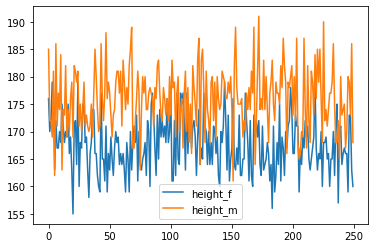

In [57]:
gym.plot()

#### Different histograms:

array([[<AxesSubplot:title={'center':'height_f'}>]], dtype=object)

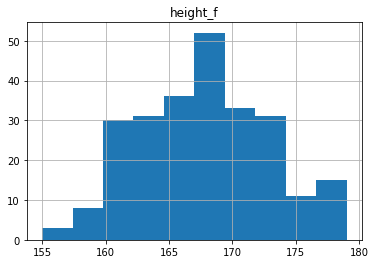

In [58]:
gym.hist('height_f')

array([[<AxesSubplot:title={'center':'height_f'}>,
        <AxesSubplot:title={'center':'height_m'}>]], dtype=object)

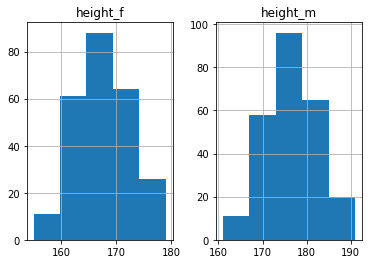

In [59]:
gym.hist(bins=5)

<AxesSubplot:ylabel='Frequency'>

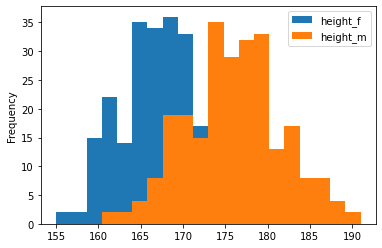

In [60]:
gym.plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

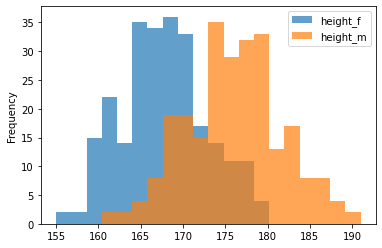

In [61]:
gym.plot.hist(bins=20, alpha=0.7)

Note: this is not a histogram. This is a barplot:

<AxesSubplot:xlabel='height_m'>

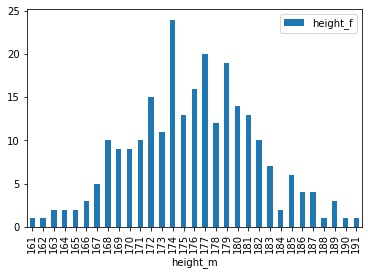

In [62]:
gym.groupby('height_m').count().plot.bar()

---
#### Back to our vaccinations data:

In [63]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url) 
vacc_df.head(2)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


#### Look at data for different countries
#### Use `groupby()` to group accoding to location

Group according to something + some columns + some summary statistic

Attempt #1 - what is wrong?

In [64]:
vacc_df.groupby('location')[['total_vaccinations']].max()

,total_vaccinations
location,
Afghanistan,6.412950e+05
Africa,4.158984e+07
Albania,8.348680e+05
Algeria,2.500000e+06
Andorra,4.147300e+04
...,...
Wallis and Futuna,8.564000e+03
World,2.388365e+09
Yemen,2.213800e+05


Attempt #3 - change the 0 from string to int, and finally, it works :-)

In [65]:
vacc_df.fillna(0).groupby('location')[['total_vaccinations','daily_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred']].max()

,total_vaccinations,daily_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred
location,,,,
Afghanistan,6.412950e+05,13921.0,158343.0,0.41
Africa,4.158984e+07,965764.0,11137066.0,0.83
Albania,8.348680e+05,17565.0,331147.0,11.51
Algeria,2.500000e+06,22664.0,0.0,0.00
Andorra,4.147300e+04,1182.0,10938.0,14.16
...,...,...,...,...
Wallis and Futuna,8.564000e+03,343.0,4119.0,36.63
World,2.388365e+09,35817809.0,726716850.0,9.32
Yemen,2.213800e+05,10240.0,0.0,0.00


#### The `world` row shouldn't be there. Remove it using `.drop()` and `.index() :

In [66]:
vacc_df.drop(vacc_df.loc[vacc_df.location == 'World'].index, inplace = True)

In [67]:
vacc_df.drop(vacc_df.loc[vacc_df.location == 'World'].index)
vacc_df[vacc_df['location']=='world']

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million


---
#### Your turn:
>What do you think `.index` does? Why is it there? How can you find out?
---

Before we continue, just assign this long row to a new dataframe, will be easier

In [68]:
grouped_df = vacc_df.fillna(0).groupby('location')[['total_vaccinations','daily_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred']].max().copy()
grouped_df.tail()

,total_vaccinations,daily_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred
location,,,,
Wales,3591060.0,33151.0,1378010.0,43.71
Wallis and Futuna,8564.0,343.0,4119.0,36.63
Yemen,221380.0,10240.0,0.0,0.00
Zambia,147115.0,5680.0,5286.0,0.03
Zimbabwe,1107058.0,22863.0,413911.0,2.78


#### sort the values using 'sort_values()`

In [69]:
grouped_df.sort_values('people_fully_vaccinated_per_hundred', ascending = False).head(3)

,total_vaccinations,daily_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred
location,,,,
Gibraltar,77753.0,1068.0,38635.0,114.67
Seychelles,137196.0,2401.0,66543.0,67.67
San Marino,43471.0,725.0,21703.0,63.95


#### Histogram according to all values:

array([[<AxesSubplot:title={'center':'total_vaccinations'}>,
        <AxesSubplot:title={'center':'daily_vaccinations'}>],
       [<AxesSubplot:title={'center':'people_fully_vaccinated'}>,
        <AxesSubplot:title={'center':'people_fully_vaccinated_per_hundred'}>]],
      dtype=object)

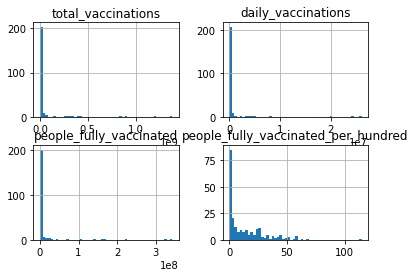

In [70]:
grouped_df.hist(bins=50)

#### Histogram according to people_fully_vaccinated_per_hundred

array([[<AxesSubplot:title={'center':'people_fully_vaccinated_per_hundred'}>]],
      dtype=object)

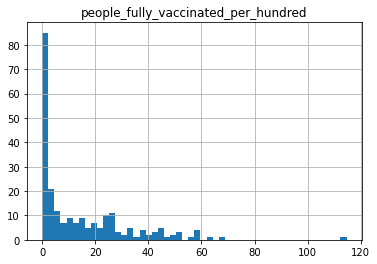

In [71]:
grouped_df.hist('people_fully_vaccinated_per_hundred',bins=50)

#### Remove rows with 0's

Note that this is different than changing values to 0's

array([[<AxesSubplot:title={'center':'people_fully_vaccinated_per_hundred'}>]],
      dtype=object)

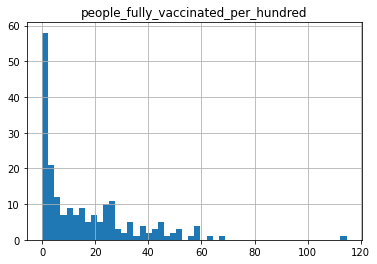

In [72]:
grouped_df.drop(grouped_df[grouped_df.people_fully_vaccinated_per_hundred == 0.0].index, inplace=True)
#grouped_df
grouped_df.hist('people_fully_vaccinated_per_hundred',bins=50)

---
>### Functions covered in this unit:
>
> `std()` - standard deviation
>
> `.hist(data, num_bins)` - the data and the number of bins 
>
> `.plot()` - simple line plot
>
> `.hist(data, num_bins, alpha)` - the data, the number of bins and the transparency (default is 10 bins, all data and not transparent)
>
> `.plot.hist()` - histograms on same chart
>
> `.groupby()` - group according to the columns specified
>
> `.drop()` - removes unwanted rows or columns
>
> `.index()` - index of the selected rows
>
> `sort_values()` - self explantory.. it just sorts values
>
---

### 2. Standard deviation

An small example showing that the more the data is spread, the higher the std:

In [73]:
df = pd.DataFrame({'height' : [161, 156, 172], 
                   'weight': [67, 65, 89],
                   'age': [20,20,20]})
df

,height,weight,age
0,161,67,20
1,156,65,20
2,172,89,20


In [74]:
df.mean()

height    163.000000
weight     73.666667
age        20.000000
dtype: float64

In [75]:
df.std()

height     8.185353
weight    13.316656
age        0.000000
dtype: float64

<a id='section2'></a>

### 3. Boxplots

In [76]:
np.random.seed(2345)
df = pd.DataFrame(np.random.randn(20,4),
                  columns=['C1', 'C2', 'C3', 'C4'])
df.head()

,C1,C2,C3,C4
0,-0.951299,1.768772,-1.141827,0.710755
1,0.510951,1.149029,-0.538460,-0.736645
2,-0.075996,0.848818,0.649783,-0.571212
3,-0.914158,-0.123520,0.281634,0.795612
4,0.179394,1.202007,0.371815,-0.290084


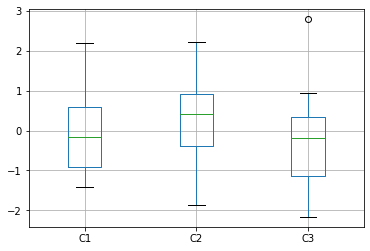

In [77]:
boxplot = df.boxplot(column=['C1', 'C2', 'C3'])

<AxesSubplot:>

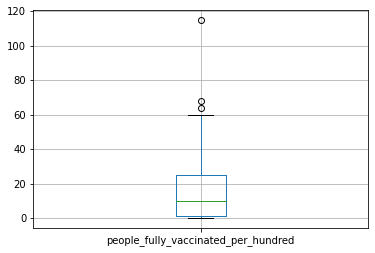

In [78]:
grouped_df.boxplot('people_fully_vaccinated_per_hundred')

In [79]:
grouped_df.sort_values('people_fully_vaccinated_per_hundred')


,total_vaccinations,daily_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred
location,,,,
Uganda,777805.0,21822.0,4129.0,0.01
Lesotho,36759.0,666.0,122.0,0.01
Liberia,64129.0,1782.0,467.0,0.01
Central African Republic,26541.0,1017.0,990.0,0.02
Zambia,147115.0,5680.0,5286.0,0.03
...,...,...,...,...
Israel,10623711.0,184946.0,5144378.0,59.43
Cayman Islands,86711.0,1024.0,39090.0,59.48
San Marino,43471.0,725.0,21703.0,63.95


# Correlations
# Unit 5
1. [Correlation computation and scatterplots](#section1)
2. [Scatterplot matrix](#section2)
3. [Heatmaps](#section3)

In [80]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/housing.csv'
house_df = pd.read_csv(url)

<a id='section1'></a>

### 1. Correlation computation and scatterplots

<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

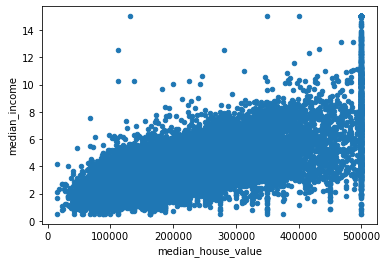

In [81]:
house_df.plot.scatter(x = 'median_house_value', y = 'median_income')

In [82]:
house_df[['median_income', 'median_house_value']].corr(method='pearson')

,median_income,median_house_value
median_income,1.000000,0.688075
median_house_value,0.688075,1.000000


In [83]:
house_df.corr(method='pearson')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<AxesSubplot:xlabel='total_bedrooms', ylabel='households'>

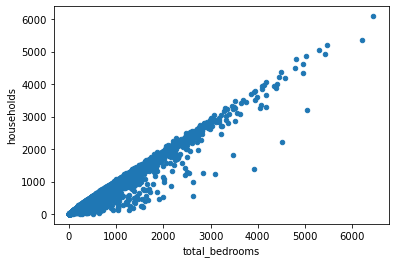

In [84]:
house_df.plot.scatter(x = 'total_bedrooms', y = 'households')

##### Almost similar - using matplotlib plt function:

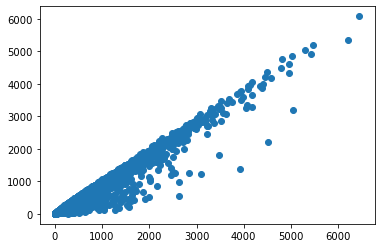

In [85]:
plt.scatter(house_df['total_bedrooms'], house_df['households'])

##### Using seaborn:

<AxesSubplot:xlabel='total_bedrooms', ylabel='households'>

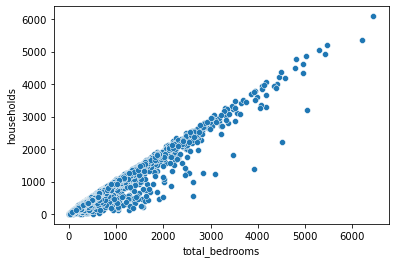

In [86]:
sns.scatterplot(data=house_df, x='total_bedrooms', y='households')

##### using seaborn with a regression line:

#### Scatterplots work when there are missing data

In [87]:
x = pd.Series(range(10, 20))
y = pd.Series([2, 1, 3, np.nan, 8, 3, 18, 25])
example_df = pd.DataFrame({'x': x, 'y': y})
example_df

,x,y
0,10,2.0
1,11,1.0
2,12,3.0
3,13,NaN
4,14,8.0
5,15,3.0
6,16,18.0
7,17,25.0
8,18,NaN
9,19,NaN


<AxesSubplot:xlabel='x', ylabel='y'>

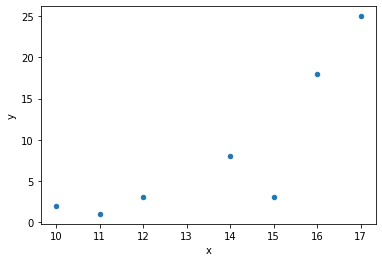

In [88]:
example_df.plot.scatter(x = 'x', y = 'y')

In [89]:
example_df.corr(method='pearson') 

,x,y
x,1.000000,0.831833
y,0.831833,1.000000


In [90]:
example_df.corr(method='spearman') 

,x,y
x,1.000000,0.900937
y,0.900937,1.000000


In [91]:
example_df.corr(method='kendall') 

,x,y
x,1.00000,0.78072
y,0.78072,1.00000


<a id='section2'></a>

### 2. Scatterplot matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>]],
      dtype=object)

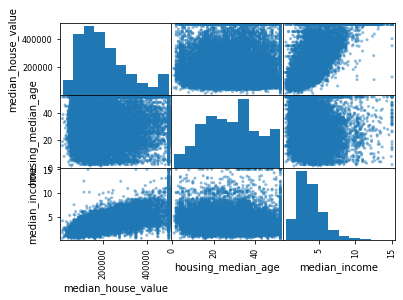

In [92]:
features = ['median_house_value', 'housing_median_age',
            'median_income']
pd.plotting.scatter_matrix(house_df[features])

In [93]:
features

['median_house_value', 'housing_median_age', 'median_income']

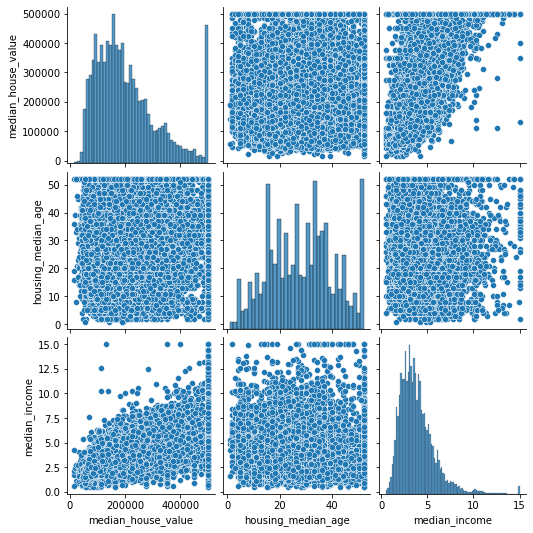

In [94]:
#sns.set()
sns.pairplot(house_df[features], height = 2.5)

<a id='section3'></a>

### 3. Heatmaps

##### Pandas doesn't contain a built-in heatmap function. We can try and create one by adding color to corr:

In [95]:
correlation_matrix = house_df[features].corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,median_house_value,housing_median_age,median_income
median_house_value,1.000000,0.105623,0.688075
housing_median_age,0.105623,1.000000,-0.119034
median_income,0.688075,-0.119034,1.000000


In [96]:
correlation_matrix.style.background_gradient(cmap='Blues')

,median_house_value,housing_median_age,median_income
median_house_value,1.000000,0.105623,0.688075
housing_median_age,0.105623,1.000000,-0.119034
median_income,0.688075,-0.119034,1.000000


##### Or we can use seaborn

In [97]:
features = ['median_house_value', 'housing_median_age','median_income','total_bedrooms','population']
correlation_matrix = house_df[features].corr().round(2)
#sns.heatmap(data=correlation_matrix,cmap='Greens', annot=True)
correlation_matrix

,median_house_value,housing_median_age,median_income,total_bedrooms,population
median_house_value,1.00,0.11,0.69,0.05,-0.02
housing_median_age,0.11,1.00,-0.12,-0.32,-0.30
median_income,0.69,-0.12,1.00,-0.01,0.00
total_bedrooms,0.05,-0.32,-0.01,1.00,0.88
population,-0.02,-0.30,0.00,0.88,1.00


---
> ##### Summary
>
>* `.corr` - compute pairwise correlation of columns, excluding NA/null values. [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
>
>* `.corr.style.background_gradient` - change the background color. [various options](corr.style.background_gradient)
>
>* `.plotting.scatter_matrix` - draw a matrix of scatter plots. [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html?highlight=scatter_matrix)
>
>* `.plot.scatter` - plot a scatter plot
>
> Seaborn package:
>
>* `sns.scatterplot` - a scatter plot
>
>* `sns.regplot` - a scatter plot with a regression line
>
>* `sns.pairplot` - scatter plot matrix
>
> * `sns.heatmap` - a heatmap. @annot = True to print the values inside the square
>
---

# unit 6 EDA example - Marketing analytics

1. [Wrangling data](#section1)

   1.1 [Fix columns](#section1.1)   
   1.2 [Missing values](#section1.2)  
   1.3 [Outliers](#section1.3)
   1.4 [Transformations](section1.4)
  
2. [Understand the data](#section2)
3. [Correlations](#section3)

In [98]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/marketing_data.csv'
mrkt_df = pd.read_csv(url)
mrkt_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


---
### 1. Wrangling data



<a id='section1.1'></a>

#### 1.1 Fix columns

So here is the problem: the 'Income' column contains extra whitespace, clean it:

In [99]:
mrkt_df.columns = mrkt_df.columns.str.replace(' ', '')

And: the 'Income' column should be turned to numeric (float is better)

In [100]:
# transform Income column to a numerical
mrkt_df['Income'] = mrkt_df['Income'].str.replace('$', '')
mrkt_df['Income'] = mrkt_df['Income'].str.replace(',', '').astype('float')

Check that our changes worked:

In [101]:
mrkt_df.dtypes['Income']

dtype('float64')

Change the date column to a date type

In [102]:
mrkt_df['Dt_Customer'] = pd.to_datetime(mrkt_df['Dt_Customer'])

<a id='section1.2'></a>

#### 1.2 Missing values

In [103]:
mrkt_df.isnull().sum().sort_values(ascending=False)

Income                 24
Country                 0
Complain                0
Year_Birth              0
Education               0
Marital_Status          0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
ID                      0
dtype: int64

The feature Income contains 24 null values

Plot this feature to identify best strategy for imputation



array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

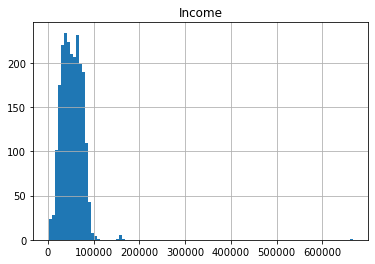

In [104]:
mrkt_df.hist('Income',bins=100)

Try more bins to get a better idea:

array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

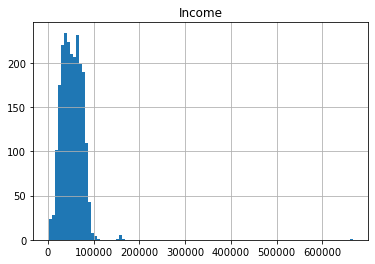

In [105]:
mrkt_df.hist('Income',bins=100)

<AxesSubplot:>

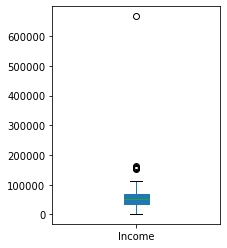

In [106]:
mrkt_df['Income'].plot(kind='box', figsize=(3,4), patch_artist=True)

Findings:

Most incomes are distributed between $0-\$100,000, with a few outliers

Replace null values with median value, to avoid effects of outliers on imputation value

In [107]:
mrkt_df['Income'] = mrkt_df['Income'].fillna(mrkt_df['Income'].median())

<a id='section1.3'></a>

#### 1.3 Noisy data - outliers

Plot only numeric columns, that are not binary or an ID:

In [108]:
#remove binary and ID
df_to_plot = mrkt_df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'])

#numeric
df_to_plot = df_to_plot.select_dtypes(include=np.number)


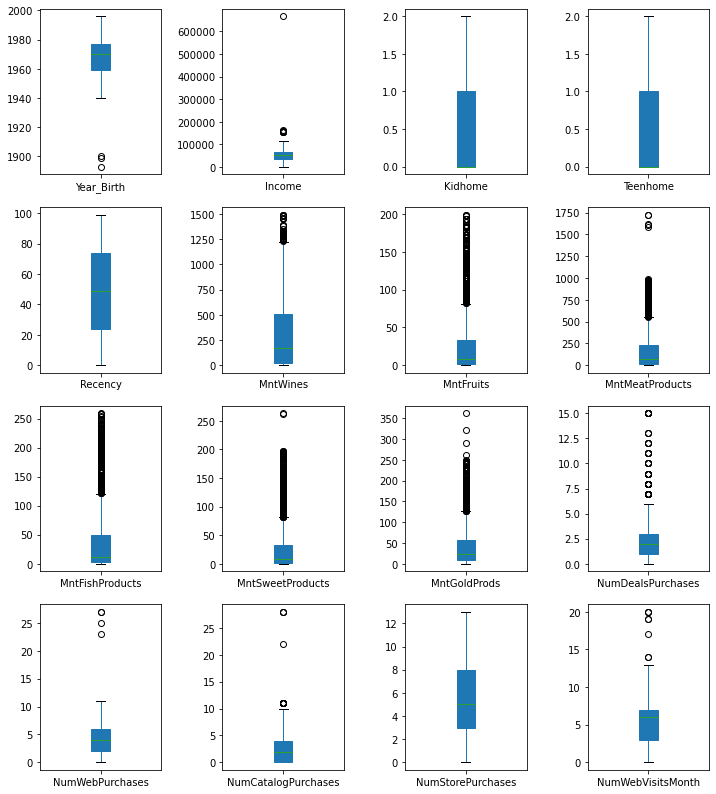

In [109]:
# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

Findings: 

Multiple features contain outliers (see boxplots), but the only that likely indicate data entry errors are Year_Birth <= 1900

Remove people born before 1900: 

In [110]:
mrkt_df = mrkt_df[mrkt_df['Year_Birth'] > 1900].reset_index(drop=True)

Check:

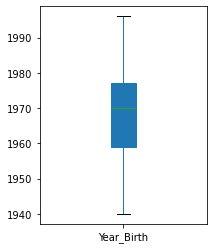

In [111]:
plt.figure(figsize=(3,4))
mrkt_df['Year_Birth'].plot(kind='box', patch_artist=True);

You can also plot via pandas:

<AxesSubplot:>

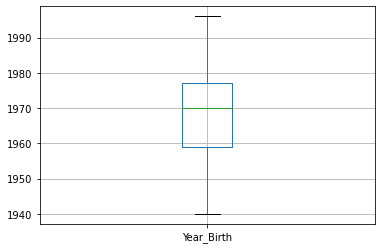

In [112]:
mrkt_df.boxplot('Year_Birth')

<a id='section1.1'></a>

#### 1.4 Transformations

Transform the date to a datetime object:

In [113]:
mrkt_df['Dt_Customer'] = pd.to_datetime(mrkt_df['Dt_Customer'])

<a id='section2'></a>

### 2. Understand the data

The total number of dependents in the home ('Dependents') can be engineered from the sum of 'Kidhome' and 'Teenhome'

In [114]:
mrkt_df['Dependents'] = mrkt_df['Kidhome'] + mrkt_df['Teenhome']

The year of becoming a customer ('Year_Customer') can be engineered from 'Dt_Customer'

In [115]:
mrkt_df['Year_Customer'] = pd.DatetimeIndex(mrkt_df['Dt_Customer']).year

The total amount spent ('TotalMnt') can be engineered from the sum of all features containing the keyword 'Mnt'

We will use [list comprehension](https://docs.python.org/3.4/tutorial/datastructures.html#list-comprehensions) to do that 

A list comprehension consists of brackets containing an expression followed by a for clause, then zero or more for or if clauses. 

In [116]:
squares = []
for x in range(10):
    squares.append(x**2)
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [117]:
squares = [x**2 for x in range(10)]
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [118]:
mnt_cols = [col for col in mrkt_df.columns if 'Mnt' in col]
mnt_cols

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

We have used `.sum()` to sum by columns. Now we want to sum rows. So `axis=1`

In [119]:
mrkt_df['TotalMnt'] = mrkt_df[mnt_cols].sum(axis=1)

The total purchases ('TotalPurchases') can be engineered from the sum of all features containing the keyword 'Purchases'

In [120]:
purchases_cols = [col for col in mrkt_df.columns if 'Purchases' in col]
mrkt_df['TotalPurchases'] = mrkt_df[purchases_cols].sum(axis=1)

The total number of campains accepted ('TotalCampaignsAcc') can be engineered from the sum of all features containing the keywords 'Cmp' and 'Response' (the latest campaign)

In [121]:
campaigns_cols = [col for col in mrkt_df.columns if 'Cmp' in col] + ['Response'] # 'Response' is for the latest campaign
mrkt_df['TotalCampaignsAcc'] = mrkt_df[campaigns_cols].sum(axis=1)

In [122]:
mrkt_df[['ID', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].head()

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,0,2014,1190,15,1
1,1,0,2014,577,18,2
2,10476,1,2014,251,11,0
3,1386,2,2014,11,4,0
4,5371,1,2014,91,8,2


<a id='section3'></a>

### 3. Correlations - patterns in the data

To find patterns in the data, we need to find correlations in the data

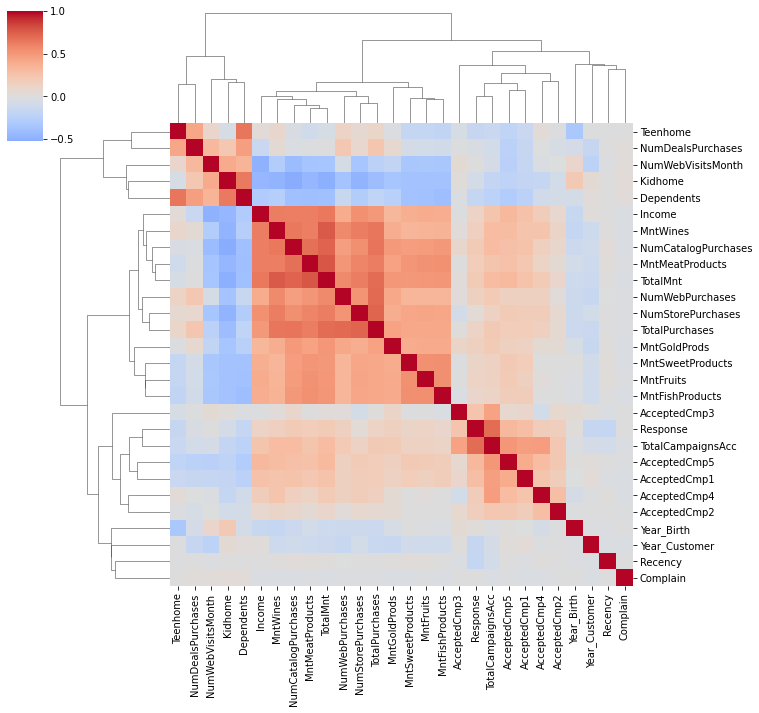

In [123]:
# calculate correlation matrix
## using non-parametric test of correlation (kendall), since some features are binary
corrs = mrkt_df.drop(columns='ID').select_dtypes(include=np.number).corr(method = 'kendall')

# plot clustered heatmap of correlations
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

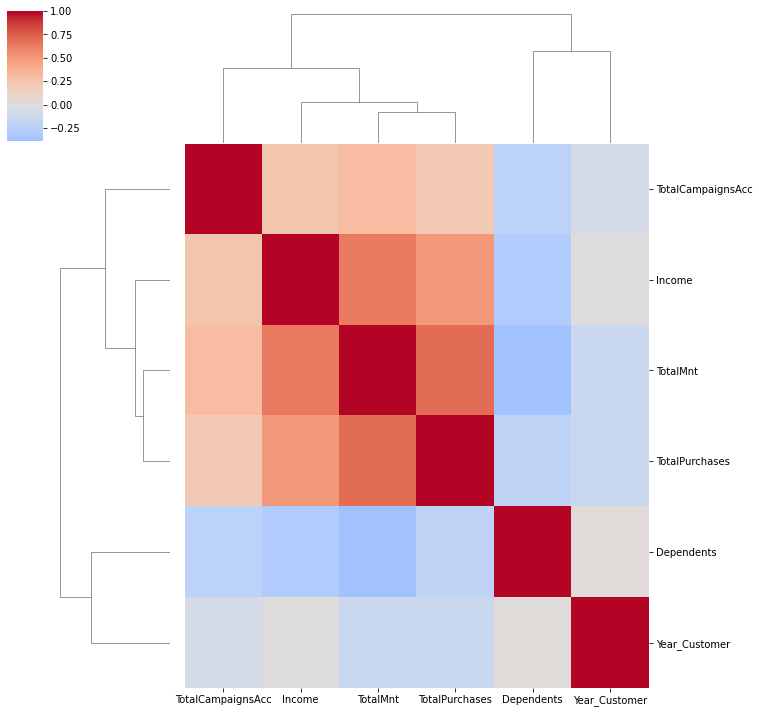

In [124]:
corrs = mrkt_df[['Income', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].select_dtypes(include=np.number).corr(method = 'kendall')

# plot clustered heatmap of correlations
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

Plot illustrating the effect of high income on spending:

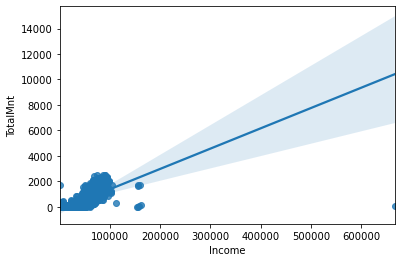

In [125]:
sns.regplot(x='Income', y='TotalMnt', data=mrkt_df);

the same, but remove the outliers:

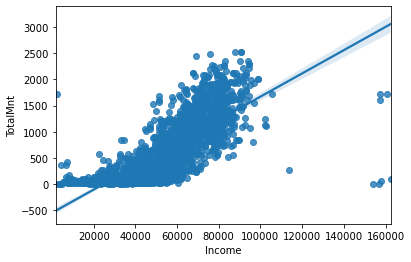

In [126]:
sns.regplot(x='Income', y='TotalMnt', data=mrkt_df[mrkt_df['Income'] < 200000]);

Plot illustrating negative effect of having dependents (kids & teens) on spending:
    
A linear plot doesn't look good here since data is discrete (same for ordinal data - e.g. - none, few, many)

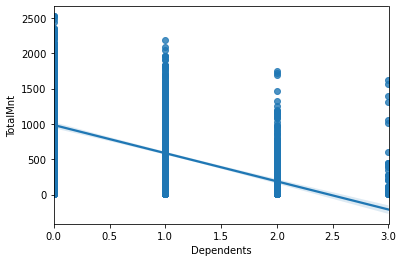

In [127]:
sns.regplot(x='Dependents', y='TotalMnt', data=mrkt_df);

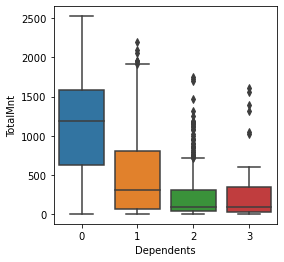

In [128]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='TotalMnt', data=mrkt_df);

Plot illustrating positive effect of having dependents (kids & teens) on number of deals purchased:

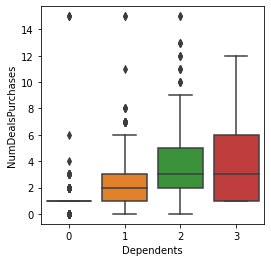

In [129]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='NumDealsPurchases', data=mrkt_df);

Plots illustrating the positive effect of income 

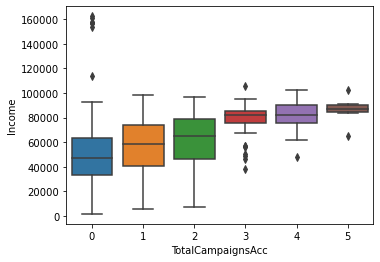

In [130]:
plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignsAcc', y='Income', data=mrkt_df[mrkt_df['Income']<200000]);

Number of web visits in the last month is not positively correlated with number of web purchases

Instead, it is positively correlated with the number of deals purchased, suggesting that deals are an effective way of stimulating purchases on the website

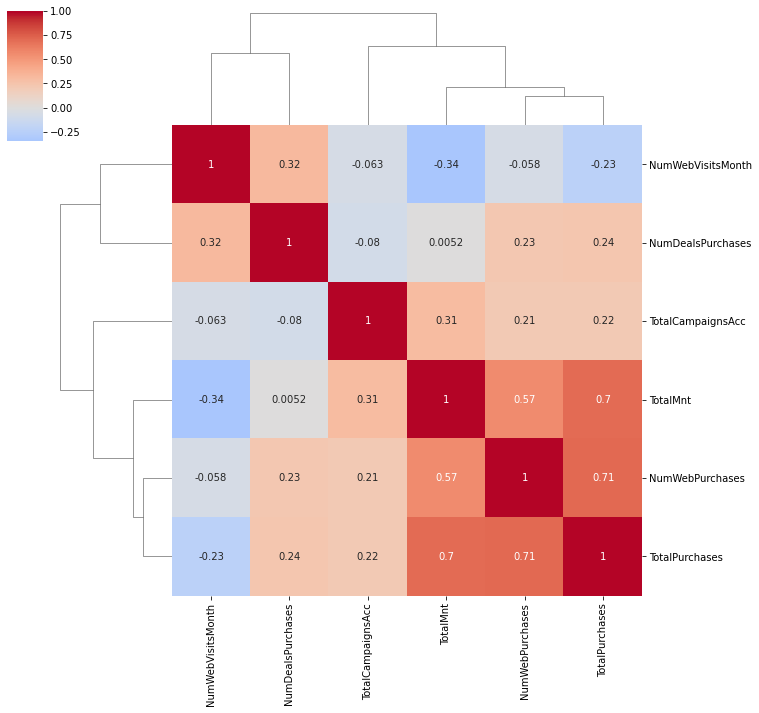

In [131]:
corrs = mrkt_df[['NumWebVisitsMonth', 'NumWebPurchases', 'NumDealsPurchases', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].select_dtypes(include=np.number).corr(method = 'kendall')

# plot clustered heatmap of correlations
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0,  annot=True);

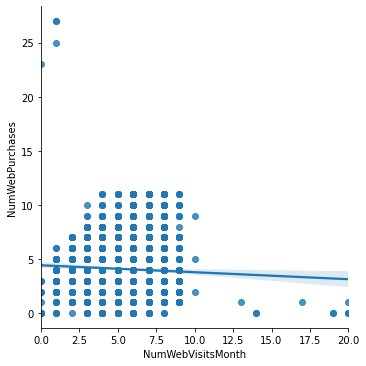

In [132]:
sns.lmplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=mrkt_df)

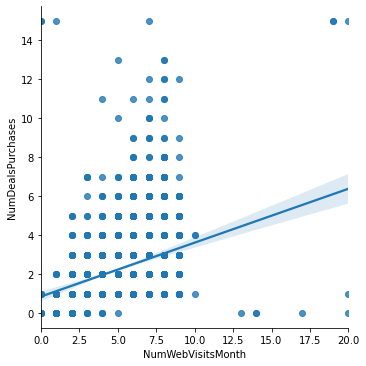

In [133]:
sns.lmplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=mrkt_df)

---
> A summary of new functions:
>
>* `.drop()` - remove labels or columns [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html?highlight=drop#pandas.DataFrame.drop)
>
>* `.str.replace('x','y')` - replace string x with string y
>
>* `.reset_index(drop=true)` - resets the index. As defult, the old index is added as a column. Use drop=True to avoid this. [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)
>
>* `plot` - a matplotlib function
>
>* `plt.subplots_adjust` - a matplotlib function. adjusts space between the plots. [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html)
>
>* `sum(axis=1)` - sums the values according to the rows, instead of the default sum by columns
>
>* create a list using [list comprehension](https://docs.python.org/3.4/tutorial/datastructures.html#list-comprehensions) - "do something for data in dataframe if condition holds"


---